## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython.display import clear_output
from random import sample

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [4]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r', encoding='utf-8') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


FileNotFoundError: [Errno 2] No such file or directory: 'sonnets.txt'

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [3]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

### Data loading: "Евгений Онегин"


### Выбрал "Евгений Онегин"


#### Загрузка произведения

Работал на windows, чтобы загрузить произведение использовал:
```cmd
!curl https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt > onegin.txt 
```

In [2]:
#!curl https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt > onegin.txt 
#!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r', encoding='utf-8') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

In [3]:
text #Список всех строк, которые есть в onegin.txt

['\n',
 'I\n',
 '\n',
 '«Мой дядя самых честных правил,\n',
 'Когда не в шутку занемог,\n',
 'Он уважать себя заставил\n',
 'И лучше выдумать не мог.\n',
 'Его пример другим наука;\n',
 'Но, боже мой, какая скука\n',
 'С больным сидеть и день и ночь,\n',
 'Не отходя ни шагу прочь!\n',
 'Какое низкое коварство\n',
 'Полуживого забавлять,\n',
 'Ему подушки поправлять,\n',
 'Печально подносить лекарство,\n',
 'Вздыхать и думать про себя:\n',
 'Когда же черт возьмет тебя!»\n',
 '\n',
 '\n',
 '\n',
 'II\n',
 '\n',
 'Так думал молодой повеса,\n',
 'Летя в пыли на почтовых,\n',
 'Всевышней волею Зевеса\n',
 'Наследник всех своих родных. —\n',
 'Друзья Людмилы и Руслана!\n',
 'С героем моего романа\n',
 'Без предисловий, сей же час\n',
 'Позвольте познакомить вас:\n',
 'Онегин, добрый мой приятель,\n',
 'Родился на брегах Невы,\n',
 'Где, может быть, родились вы\n',
 'Или блистали, мой читатель;\n',
 'Там некогда гулял и я:\n',
 'Но вреден север для меня\n',
 '\n',
 '\n',
 'III\n',
 '\n',
 'Сл

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [4]:
len(text) #Всего строк в файле

7088

In [5]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

#Переводим к строчному регистру
text = list(map(lambda x : x.lower(), text)) #Делаем строчные символы
# text = " ".join(text) #Объединяем все в одну строку

In [6]:
text

['\n',
 'i\n',
 '\n',
 '«мой дядя самых честных правил,\n',
 'когда не в шутку занемог,\n',
 'он уважать себя заставил\n',
 'и лучше выдумать не мог.\n',
 'его пример другим наука;\n',
 'но, боже мой, какая скука\n',
 'с больным сидеть и день и ночь,\n',
 'не отходя ни шагу прочь!\n',
 'какое низкое коварство\n',
 'полуживого забавлять,\n',
 'ему подушки поправлять,\n',
 'печально подносить лекарство,\n',
 'вздыхать и думать про себя:\n',
 'когда же черт возьмет тебя!»\n',
 '\n',
 '\n',
 '\n',
 'ii\n',
 '\n',
 'так думал молодой повеса,\n',
 'летя в пыли на почтовых,\n',
 'всевышней волею зевеса\n',
 'наследник всех своих родных. —\n',
 'друзья людмилы и руслана!\n',
 'с героем моего романа\n',
 'без предисловий, сей же час\n',
 'позвольте познакомить вас:\n',
 'онегин, добрый мой приятель,\n',
 'родился на брегах невы,\n',
 'где, может быть, родились вы\n',
 'или блистали, мой читатель;\n',
 'там некогда гулял и я:\n',
 'но вреден север для меня\n',
 '\n',
 '\n',
 'iii\n',
 '\n',
 'сл

In [7]:
len(text) #Длинна получившейся строки

7088

Put all the characters, that you've seen in the text, into variable `tokens`.

In [8]:
tokens = sorted(set(''.join(text))) #Формируем список всех токенов (в данном случае символы), которые встречаются в тексте 

In [9]:
len(tokens) #83 токена

83

In [10]:
tokens

['\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '5',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '^',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '«',
 '»',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 '–',
 '—',
 '’',
 '…',
 '€']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [11]:
# dict <index>:<char>
# Your great code here
idx_to_token = { i:char for i,char in enumerate(tokens)}

# dict <char>:<index>
# Your great code here
token_to_idx = { char:i for i,char in enumerate(tokens)}

In [12]:
print(len(idx_to_token))
print(len(token_to_idx))

83
83


In [13]:
idx_to_token

{0: '\n',
 1: ' ',
 2: '!',
 3: '(',
 4: ')',
 5: ',',
 6: '-',
 7: '.',
 8: '5',
 9: '7',
 10: '8',
 11: '9',
 12: ':',
 13: ';',
 14: '?',
 15: '[',
 16: ']',
 17: '^',
 18: 'a',
 19: 'b',
 20: 'c',
 21: 'd',
 22: 'e',
 23: 'f',
 24: 'g',
 25: 'h',
 26: 'i',
 27: 'k',
 28: 'l',
 29: 'm',
 30: 'n',
 31: 'o',
 32: 'p',
 33: 'q',
 34: 'r',
 35: 's',
 36: 't',
 37: 'u',
 38: 'v',
 39: 'w',
 40: 'x',
 41: 'y',
 42: 'z',
 43: '«',
 44: '»',
 45: 'а',
 46: 'б',
 47: 'в',
 48: 'г',
 49: 'д',
 50: 'е',
 51: 'ж',
 52: 'з',
 53: 'и',
 54: 'й',
 55: 'к',
 56: 'л',
 57: 'м',
 58: 'н',
 59: 'о',
 60: 'п',
 61: 'р',
 62: 'с',
 63: 'т',
 64: 'у',
 65: 'ф',
 66: 'х',
 67: 'ц',
 68: 'ч',
 69: 'ш',
 70: 'щ',
 71: 'ъ',
 72: 'ы',
 73: 'ь',
 74: 'э',
 75: 'ю',
 76: 'я',
 77: 'ё',
 78: '–',
 79: '—',
 80: '’',
 81: '…',
 82: '€'}

In [14]:
token_to_idx

{'\n': 0,
 ' ': 1,
 '!': 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '-': 6,
 '.': 7,
 '5': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 '[': 15,
 ']': 16,
 '^': 17,
 'a': 18,
 'b': 19,
 'c': 20,
 'd': 21,
 'e': 22,
 'f': 23,
 'g': 24,
 'h': 25,
 'i': 26,
 'k': 27,
 'l': 28,
 'm': 29,
 'n': 30,
 'o': 31,
 'p': 32,
 'q': 33,
 'r': 34,
 's': 35,
 't': 36,
 'u': 37,
 'v': 38,
 'w': 39,
 'x': 40,
 'y': 41,
 'z': 42,
 '«': 43,
 '»': 44,
 'а': 45,
 'б': 46,
 'в': 47,
 'г': 48,
 'д': 49,
 'е': 50,
 'ж': 51,
 'з': 52,
 'и': 53,
 'й': 54,
 'к': 55,
 'л': 56,
 'м': 57,
 'н': 58,
 'о': 59,
 'п': 60,
 'р': 61,
 'с': 62,
 'т': 63,
 'у': 64,
 'ф': 65,
 'х': 66,
 'ц': 67,
 'ч': 68,
 'ш': 69,
 'щ': 70,
 'ъ': 71,
 'ы': 72,
 'ь': 73,
 'э': 74,
 'ю': 75,
 'я': 76,
 'ё': 77,
 '–': 78,
 '—': 79,
 '’': 80,
 '…': 81,
 '€': 82}

In [15]:
NUM_TOKENS = len(tokens) #Количество токенов
NUM_TOKENS

83

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

--- 
Получилось больше, потому что у меня "Евгений Онегин"

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [16]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [19]:
# Your code here
#RNN сеть (однослойная)
class MyVanillaRNN(nn.Module):
    def __init__(self, num_tokens, embedding_size = 15, rnn_num_units=1024):
        ''' 
        (Args)
            num_tokens - кол-во токенов
            embedding_size - 15 - размер эмбеддинга (размер вектора)
            rnn_num_units - 1024 - кол-во нейронов на скрытом слою
        '''

        super().__init__()
        self.num_units = rnn_num_units
        
        #Слой эмбеддинга
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        #RNN-слой
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        ''' 
        (Args)
            x - тензор, данные
            h_prev - скрытый слой
        '''
        #Переводим в эмбеддинг
        x_emb = self.embedding(x)
        x_and_h = torch.cat([x_emb, h_prev], dim=1)

        h_next = self.rnn_update(x_and_h)
        h_next = torch.functional.F.tanh(h_next)

        assert h_next.size() == h_prev.size()

        logits = self.rnn_to_logits(h_next)

        return h_next, logits

    def initial_state(self, batch_size):
        ''' 
        Инициализация стартового скрытого состояния
        '''
        device = next(self.parameters()).device
        return torch.zeros(batch_size, self.num_units).to(DEVICE)  # Форма: [batch_size, num_units]

In [17]:
def rnn_loop(rnn, batch_index):
    batch_size, max_length = batch_index.size() #Размер тензора (батч индексов токенов)
    hid_state = rnn.initial_state(batch_size).to(DEVICE) #Инициализация начального скрытого состояния
    logprobs = [] #Массив логгитов

    for x_t in batch_index.transpose(0,1): #Идем по батчу индексов, трансформируем (по сути в массив массивов (каждый индекс [[index],[index],[index]]))
        hid_state, logp_next = rnn(x_t, hid_state) #Передаем коллекцию векторов
        logprobs.append(logp_next) #Добавляем полученный логгит
       
    return torch.stack(logprobs, dim=1) #Формируем тензор из логитов

In [20]:
myVanillaRNN = MyVanillaRNN(NUM_TOKENS).to(DEVICE) #Сетка
opt = torch.optim.Adam(myVanillaRNN.parameters()) #Оптимизатор
loss_fn = nn.CrossEntropyLoss() #Функция потерь

In [ ]:
history = [] #Список для хранения loss'ов
BATCH_SIZE = 512 #Размер батча (сколько предложений в батче)
#При обучении RNN и LSTM использовал BATCH_SIZE = 1024
MAX_LEN = max(map(len, text)) #Максимальная длинна генерируемой последовательности
EPOCH = 2000

In [22]:
MAX_LEN

159

In [23]:
def to_matrix(data, token_to_idx, max_len = None, dtype='int32', batch_first = True):
    ''' 
    Формируем матрицу
    (Args)
        data - строка с данными
        token_to_idx - словарь (token:index)
        max_len - максимальная длинна генерируемой последовательности
        dtype - тип данных чисел
        batch_first - является ли бантч первым (для initial_state)
    '''

    max_len = max_len or max(map(len, data)) #Длинна генерируемой последовательности
    data_ix = np.zeros([len(data), max_len], dtype) + token_to_idx[' '] #Матрица нулей: строки - len(data) | столбцы - макс. длинна

    for i in range(len(data)): #идем по переданным строкам
        line_ix = [token_to_idx[c] for c in data[i]] #переводим токен в соответствующий index используя (token_to_idx)
        data_ix[i, :len(line_ix)] = line_ix #На место соответствующего токена помещаем индекс

    if not batch_first: #Если батч не первый
        data_ix = np.transpose(data_ix) #Транспонируем

    return data_ix #возвращаем созданную матрицу индексов соответствующих токенов, для каждого предложения

Plot the loss function (axis X: number of epochs, axis Y: loss function).

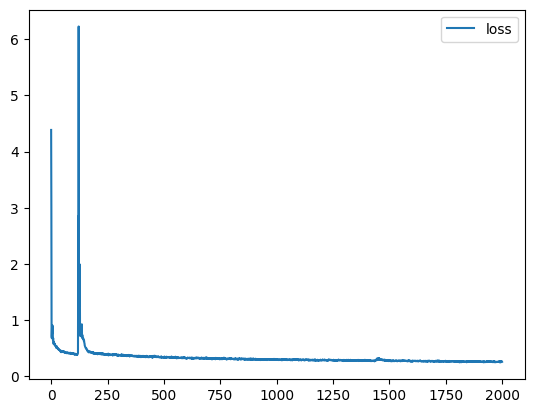

In [23]:
for i in range(EPOCH): #Кол-во эпох
    batch_ix = to_matrix(sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LEN) #Генерируем батч (переводим строки в соответствующие векторы индексов токенов)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(DEVICE) #Создаем тензор и переносим на устройство
    
    logp_seq = rnn_loop(myVanillaRNN, batch_ix) #Получаем наши логгиты
    
    # compute loss
    predictions_logp = logp_seq[:, :-1] #без последнего токена
    actual_next_tokens = batch_ix[:, 1:] #без первого токена

    loss = loss_fn(
    predictions_logp.reshape((-1, NUM_TOKENS)),
    actual_next_tokens.reshape(-1)
    ) #Вычисляем ошибку

    loss.backward() #Обратное распространение
    opt.step() #Обновление весов
    opt.zero_grad() #Обнуление градиентов
    
    history.append(loss.cpu().data.numpy()) #Переносим на cpu и добавляем loss для визуализации
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

* На графике выше, можно наблюдать как изменяются потери, в завивимости от номера эпохи
---

#### Генерация текста

In [24]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LEN, temperature=0.3):
    ''' 
    (Args)
        char_rnn - модель, которая используется для генерации
        seed_phrase=' ' - сид фраза, с чего начинается генерация
        max_length=MAX_LEN - длинна генерируемой последовательности
        temperature=0.3 - насколько модель будет брать менее вероятные токены
    '''
    seed_phrase = seed_phrase.lower() #Нужно всегда переводить в нижний регист, так как работаем только с токенами в нижнем регистре
    x_sequence = [token_to_idx[token] for token in seed_phrase] #Переводим фразу в список индексов соответствующих токенов
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64) #Формируем тензор
    hid_state = char_rnn.initial_state(batch_size=1).to(DEVICE) #Инициируем начальное скрытое состояние RNN 
    
    for i in range(len(seed_phrase) - 1): #Проходимся по фразе
        hid_state, _ = char_rnn(x_sequence[:, i].to(DEVICE), hid_state) #Генерируем состояния. На последней итерации будет состояние, содержащее информацию о всей строке
    
    for _ in range(max_length - len(seed_phrase)): #Генерируем последовательность (отнимаем размер сид фразы, для корректности размера генерируемой последовательности)
        hid_state, logp_next = char_rnn(x_sequence[:, -1].to(DEVICE), hid_state) #Получаем новое скрытое состояние и логгиты
        p_next = torch.functional.F.softmax(logp_next / temperature, dim=-1).cpu().data.numpy()[0] #формируем вектор вероятностей для следующего токена      
        next_ix = np.random.choice(len(tokens), p=p_next) #будет вектор из 1 элемента - index токена, который был вытянут с соответствующей вероятностью из p
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64) #Формируем тензор
        x_sequence = torch.cat([x_sequence, next_ix], dim=1) #Конкатенируем с имеющейся последовательностью (видимо для будущего принта, чтобы было все вместе)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]]) #Формируем строку и возвращаем

In [28]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

seed_phrase =' Забвенье '
for i in range(5):
    tmp = generate_sample(myVanillaRNN,seed_phrase=seed_phrase, max_length=MAX_LEN, temperature=0.7)
    print(len(tmp)) #То есть, не смотря на длинну последовательности - он ничего не генерирует, генерирует пробелы
    print(tmp)
    print("---------------")

159
 забвенье гочто ддом,
                                                                                                                                         
---------------
159
 забвенье сумала;
                                                                                                                                             
---------------
159
 забвенье порледа.
                                                                                                                                            
---------------
159
 забвенье им на дела
                                                                                                                                          
---------------
159
 забвенье дот встали,
                                                                                                                                         
---------------


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [ ]:
# Your beautiful code here

In [25]:
#LSTM модель, использую слой из PyTorch
class MyNotVanilleLSTM_v2(nn.Module):
    def __init__(self, num_tokens, embedding_size=15, lstm_num_units=1024, num_layers=1):
        super().__init__()
        self.num_units = lstm_num_units
        self.num_layers = num_layers
        #Эмбеддинг слой
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        #LSTM-слой
        self.LSTMLayer = nn.LSTM(embedding_size + lstm_num_units, lstm_num_units, num_layers=num_layers)
        #Для логгитов
        self.lstm_to_logits = nn.Linear(lstm_num_units, num_tokens)

    def forward(self, x, h_prev, c_prev):
        #переводим в эмбеддинг
        x_emb = self.embedding(x)
        #конкатенируем с вектором скрытого состояния
        x_and_h = torch.cat([x_emb, h_prev.squeeze(0)], dim=1)
        #прогоняем через LSTM-слой
        out, (h_next, c_next) = self.LSTMLayer(x_and_h.unsqueeze(0), (h_prev, c_prev))  # Входная форма: (1, batch_size, embedding_size + num_units)
        #предсказываем логгиты
        logits = self.lstm_to_logits(out)
        
        return h_next, c_next, logits.squeeze(0)

    def initial_state(self, batch_size):
        ''' Инициализация h and c '''
        return (torch.zeros(self.num_layers, batch_size, self.num_units, dtype=torch.float32),
                torch.zeros(self.num_layers, batch_size, self.num_units, dtype=torch.float32))

In [26]:
def lstm_loop(lstm, batch_index): #цикл как и RNN, только учитываем что еще есть c_state
    batch_size, max_length = batch_index.size() #Размер тензора
    hid_state,cell_state = lstm.initial_state(batch_size) #Инициализируем начальное состояние
    hid_state = hid_state.to(DEVICE) #Переносим на устройство
    cell_state = cell_state.to(DEVICE)
    logprobs = [] #Для сохранения логгитов
    
    for x_t in batch_index.transpose(0,1): #Идем по строкам в батче (по векторам индексов)
        hid_state, cell_state, logp_next = lstm(x_t, hid_state, cell_state) #Предсказываем
        logprobs.append(logp_next) #Сохраняем полученные логиты (тут в softmax в лог.шкале)
        
    return torch.stack(logprobs, dim=1) #формируем тензор из логгитов и возвращаем

In [27]:
myNotVanilLSTM = MyNotVanilleLSTM_v2(NUM_TOKENS).to(DEVICE) #LSTM'ка
opt = torch.optim.Adam(myNotVanilLSTM.parameters()) #Оптимизатор
loss_fn = nn.CrossEntropyLoss() #Функция потерь

history_LSTM = [] #Для сохранения лоссов LSTM

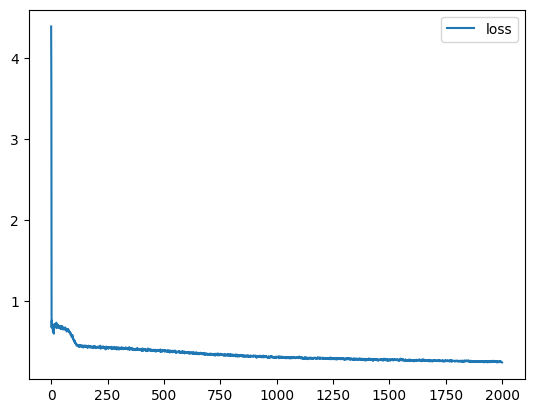

In [ ]:
for i in range(EPOCH):
    batch_ix = to_matrix(sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LEN)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(DEVICE)
    # batch_ix : shape - 256:159
    
    logp_seq = lstm_loop(myNotVanilLSTM, batch_ix)
    
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    # loss = -torch.mean(torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None]))###YOUR CODE
    loss = loss_fn(
        predictions_logp.reshape((-1, NUM_TOKENS)),
        actual_next_tokens.reshape(-1)
        ) #Вычисляем ошибку

    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history_LSTM.append(loss.cpu().data.numpy())
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history_LSTM,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history_LSTM[:10]) > np.mean(history_LSTM[-10:]), "LSTM didn't converge."

- Проанализировав график выше (потери при обучении LSTM) можно заметить, что быстро уменьшились и держались близко к нулю (очень мало уменьшается)

In [28]:
def generate_sample_lstm(char_rnn, seed_phrase=' ', max_length=MAX_LEN, temperature=0.3): 
    seed_phrase = seed_phrase.lower()
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state, cell_state = char_rnn.initial_state(batch_size=1)
    hid_state=hid_state.to(DEVICE)
    cell_state=cell_state.to(DEVICE)

    for i in range(len(seed_phrase) - 1):
        hid_state,cell_state, _ = char_rnn(x_sequence[:, i].to(DEVICE), hid_state, cell_state)
    

    for _ in range(max_length - len(seed_phrase)):
        hid_state, cell_state,logp_next = char_rnn(x_sequence[:, -1].to(DEVICE), hid_state, cell_state)
        p_next = torch.functional.F.softmax(logp_next / temperature, dim=-1).cpu().data.numpy()[0]
        
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.cpu().data.numpy()[0]])

In [37]:
seed_phrase_lstm =' Мой дядя '
for i in range(5):
    tmp = generate_sample_lstm(myNotVanilLSTM, seed_phrase=seed_phrase_lstm, max_length=MAX_LEN, temperature=0.7)
    print(len(tmp)) #То есть, не смотря на длинну последовательности - он ничего не генерирует, генерирует пробелы
    print(tmp)
    print("---------------")

159
 мой дядя на поснуе,
                                                                                                                                          
---------------
159
 мой дядя в пруго подеттом,
                                                                                                                                   
---------------
159
 мой дядя бранить постеве
,                                                                                                                                    
---------------
159
 мой дядя вамой достит.
                                                                                                                                       
---------------
159
 мой дядя то но умее,».
                                                                                                                                       
---------------


- Поэзия не стала более поэтичной

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [35]:
# Text generation with different temperature values here
temperatures = [.1, .2, .5, 1.0, 2.0]

seed_phrase_lstm =' Мой дядя '
for t in temperatures: #Идем по температурам
    print(f"temp: {t}")
    for i in range(5): #Сделаем 5 генераций для каждого значения температуры
        tmp = generate_sample_lstm(myNotVanilLSTM, seed_phrase=seed_phrase_lstm, max_length=MAX_LEN, temperature=t)
        print(f"LEN: {len(tmp)}") #То есть, не смотря на длинну последовательности - он ничего не генерирует, генерирует пробелы
        print(tmp)
        print("---------------")
    

temp: 0.1
LEN: 159
 мой дядя в половой долод
                                                                                                                                     
---------------
LEN: 159
 мой дядя в не в не светом
                                                                                                                                    
---------------
LEN: 159
 мой дядя в сердце света
                                                                                                                                      
---------------
LEN: 159
 мой дядя в сердце сворой
                                                                                                                                     
---------------
LEN: 159
 мой дядя свое половой
                                                                                                                                        
---------------
temp: 0.2
LEN: 159
 мой дядя в сердце светом
                    

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

#### Сохранение модели - RNN

In [29]:
#Сохранение модели
torch.save(myVanillaRNN.state_dict(), 'myVanillaRNN_weigths.pt')

#### Загрузка модели - RNN

In [29]:
#Загрузка модели
myVanillaRNN.load_state_dict(torch.load('myVanillaRNN_weigths.pt'))
myVanillaRNN.eval() 

MyVanillaRNN(
  (embedding): Embedding(83, 15)
  (rnn_update): Linear(in_features=1039, out_features=1024, bias=True)
  (rnn_to_logits): Linear(in_features=1024, out_features=83, bias=True)
)

#### Сохранение модели - LSTM

In [41]:
#Сохранение модели
torch.save(myNotVanilLSTM.state_dict(), 'myNotVanillaLSTM_weigths.pt')

#### Загрузка модели - LSTM

In [30]:
#Загрузка модели
myNotVanilLSTM.load_state_dict(torch.load('myNotVanillaLSTM_weigths.pt'))
myNotVanilLSTM.eval() 

MyNotVanilleLSTM_v2(
  (embedding): Embedding(83, 15)
  (LSTMLayer): LSTM(1039, 1024)
  (lstm_to_logits): Linear(in_features=1024, out_features=83, bias=True)
)

In [4]:
# Saving and loading code here

#### Генерация примеров текстов на RNN и LSTM

In [53]:
#Генерируем RNN'кой

seed_phrase ='Забвенье жизни'
for i in range(5):
    tmp = generate_sample(myVanillaRNN,seed_phrase=seed_phrase, max_length=MAX_LEN, temperature=0.6)
    print(len(tmp)) #То есть, не смотря на длинну последовательности - он ничего не генерирует, генерирует пробелы
    print(tmp)
    print("---------------")

159
забвенье жизниланось дон.
                                                                                                                                     
---------------
159
забвенье жизнит и слода!
                                                                                                                                      
---------------
159
забвенье жизни ет едал
                                                                                                                                        
---------------
159
забвенье жизни угдувила;
                                                                                                                                      
---------------
159
забвенье жизни мечта трочей.
                                                                                                                                  
---------------


In [54]:
#Генерируем LSTM'кой

seed_phrase_lstm ='Забвенье жизни'
for i in range(5):
    tmp = generate_sample_lstm(myNotVanilLSTM, seed_phrase=seed_phrase_lstm, max_length=MAX_LEN, temperature=0.6)
    print(len(tmp)) #То есть, не смотря на длинну последовательности - он ничего не генерирует, генерирует пробелы
    print(tmp)
    print("---------------")

159
забвенье жизни сладь могов
                                                                                                                                    
---------------
159
забвенье жизни стране на
                                                                                                                                      
---------------
159
забвенье жизние в нел,
                                                                                                                                        
---------------
159
забвенье жизниволитьень,
                                                                                                                                      
---------------
159
забвенье жизнивал вичет,
                                                                                                                                      
---------------


In [51]:
generate_sample(myVanillaRNN,seed_phrase="Тать", max_length=MAX_LEN, temperature=0.6)

'татьяна изданил ог ем:\n                                                                                                                                        '

In [52]:
generate_sample_lstm(myNotVanilLSTM, seed_phrase="Тать", max_length=MAX_LEN, temperature=0.6)

'татьяна в зазною погодой\n                                                                                                                                      '

- На уровне слов, хотя бы генерирует, сгенерировал имя Татьяна

### Выводы

- За 2000 эпох, потери значительно снижаются, для данных моделей
- Скорей всего модели переобучаются из-за недостатка данных
- Модели генерируют полностью требуемую длинну последовательности, но часто "хвост" состоит из пробелов. Изменение температуры позволяет это заметить, от раза к разу получается сгенерировать последовательность длинней. Но все равно они не генерируют полностью, например, 128 токенов, как требуется (хотя пробельный символ - тоже токен).
- Возможно, не стоило прогонять модели прям все 2000 эпох, скорей всего они переучились. Что можно заметить, что качество генерации текстов, очень низкое (если оценить визуально).
- Предобработка текста для данной задачи не была выполнена, потому что удаление стоп-слов, привод слов к нормальной форме и т.п. исказило бы стиль произведения, а также модель училась бы генерировать слова не целиком.

#### Что хотелось бы сделать еще
- Хотелось бы попробовать руками собрать 2-ух слойную RNN-ку (по сути выход первой является входом для второй, в самом конце - логгиты)
Но на сильно маленьком датасете (как в данном случае результата лучше, скорей всего, не будет)
- Поиграться с параметрами RNN-слоя (попробовать сделать меньше, больше, в данном примере 1024)
- Взять RNN слой из PyTorch, тоже обучить и сравнить с текущей реализацией
- Хотелось бы руками собрать LSTM-ку, возможно, тоже несколько слойную
- Попробовать сделать другую токенизацию, не на уровне букв, а на уровне нескольких (токены в привычном понимании) и так же, пройтись по последовательности.
Но наверное, для данного корпуса будет не логично строить свой токенизатор, а если брать готовый (в котором может быть не будут все токены, которые есть в данном корпусе, возможно). А дальше так же, на уровне токенов заменять на соответствующие индексы и передавать дальше в эмбеддинг слой модели и т.д.

----------

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch)